In [2]:
# sales_prediction.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the dataset
df = pd.read_csv("advertising.csv")

In [4]:
# Step 1: Explore the data
print("📊 Dataset Head:\n", df.head())
print("\n📈 Correlation Matrix:\n", df.corr())

📊 Dataset Head:
       TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

📈 Correlation Matrix:
                  TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


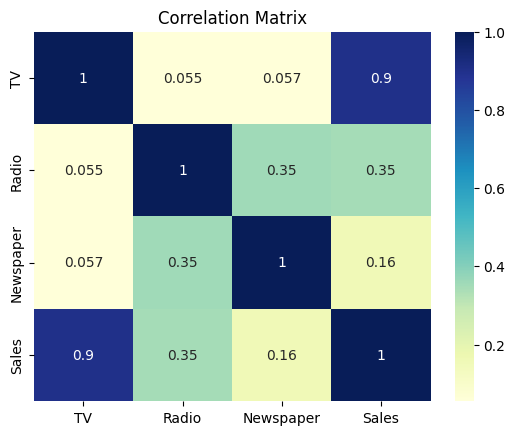

In [5]:
# Optional: Visualize correlations
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Matrix")
plt.show()

In [7]:
# Step 2: Define features and target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [8]:
# Step 3: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Step 4: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Step 5: Evaluate the model
y_pred = model.predict(X_test)
print(" R² Score:", r2_score(y_test, y_pred))
print(" RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

 R² Score: 0.9059011844150826
 RMSE: 1.7052146229349223


In [12]:
# Step 6: Display coefficients
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\n Coefficients:\n", coef_df)


 Coefficients:
      Feature  Coefficient
0         TV     0.054509
1      Radio     0.100945
2  Newspaper     0.004337


In [14]:
# Step 7: Predict future sales (example)
future_data = pd.DataFrame({
    'TV': [150.0, 200.0],
    'Radio': [30.0, 40.0],
    'Newspaper': [20.0, 25.0]
})
future_predictions = model.predict(future_data)

In [16]:
# Display predictions
for i, pred in enumerate(future_predictions):
    print(f" Predicted Sales for input {i+1}: {pred:.2f} units")

 Predicted Sales for input 1: 16.01 units
 Predicted Sales for input 2: 19.76 units


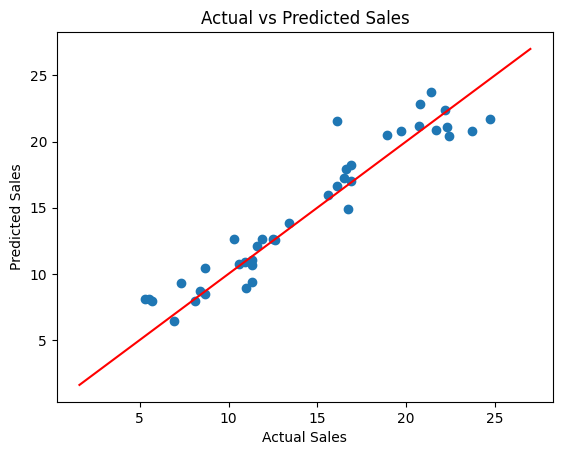

In [17]:
# Optional: Visualize actual vs predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([min(y), max(y)], [min(y), max(y)], color='red')
plt.show()